# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CA_housing.csv')
dataset = dataset.dropna(axis=0)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = pd.concat([dataset.iloc[:, :-2], dataset.iloc[:, -1]], axis=1).values
X = np.array(ct.fit_transform(X))
y = dataset.iloc[:, -2:-1].values

In [3]:
print(X)

[[0.0 0.0 0.0 ... 322.0 126.0 8.3252]
 [0.0 0.0 0.0 ... 2401.0 1138.0 8.3014]
 [0.0 0.0 0.0 ... 496.0 177.0 7.2574]
 ...
 [0.0 1.0 0.0 ... 1007.0 433.0 1.7]
 [0.0 1.0 0.0 ... 741.0 349.0 1.8672]
 [0.0 1.0 0.0 ... 1387.0 530.0 2.3886]]


In [4]:
print(y)

[[452600.]
 [358500.]
 [352100.]
 ...
 [ 92300.]
 [ 84700.]
 [ 89400.]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)

In [7]:
print(X_train)

[[ 1.12552858 -0.68322637 -0.01564507 ...  0.00483636  0.00862081
   0.99880176]
 [-0.88847144  1.46364373 -0.01564507 ... -0.3400763  -0.47001711
  -1.18597188]
 [-0.88847144  1.46364373 -0.01564507 ... -0.0618643  -0.51448074
  -0.17621891]
 ...
 [-0.88847144 -0.68322637 -0.01564507 ...  0.14087062 -0.08815298
   0.08804108]
 [ 1.12552858 -0.68322637 -0.01564507 ... -0.14787306 -0.8754208
  -0.25843195]
 [-0.88847144  1.46364373 -0.01564507 ... -0.30058249 -0.52755827
  -1.25372006]]


In [8]:
print(y_train)

[[ 0.46173593]
 [-1.18006207]
 [-0.77004599]
 ...
 [-0.66082395]
 [-0.35829623]
 [-1.15752419]]


## Training the SVR model on the whole dataset

In [9]:
y_train = y_train.reshape(len(y_train),)

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

## Predicting a new result

In [11]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[0.0, 1.0, 0.0, 0.0, 0.0, -121.24, 39.37, 16.0, 2785.0, 616.0,
       1387.0, 530.0, 2.3886]])))

array([102645.13192849])

In [12]:
y[-1]

array([89400.])

## Visualising the SVR results

In [18]:
# plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
# plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
# plt.title('Truth or Bluff (SVR)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [19]:
# X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
# plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
# plt.title('Truth or Bluff (SVR)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

In [13]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.21e+05 -9.34e-01]
 [ 1.75e+05 -4.65e-01]
 [ 1.12e+05 -1.00e+00]
 ...
 [ 1.50e+05 -6.90e-01]
 [ 1.98e+05 -4.16e-01]
 [ 2.17e+05 -2.74e-01]]


In [14]:
df = pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), sc_y.inverse_transform(y_test).reshape(len(y_test),1)),1), columns=['Predicted ($)', 'Actual ($)'])
df

,Predicted ($),Actual ($)
0,120720.851789,98900.0
1,175132.336592,153000.0
2,112458.378491,91300.0
3,425983.616348,345200.0
4,348017.512007,344100.0
...,...,...
4082,88494.305876,76300.0
4083,276092.823752,261600.0
4084,149969.883805,127000.0
4085,198128.997334,158600.0


In [15]:
import dataframe_image as dfi
dfi.export(df, 'act_pred_svr.png', max_rows=5)

In [16]:
px = np.linspace(0, max(sc_y.inverse_transform(y_test)), int(max(sc_y.inverse_transform(y_test))))
py = np.linspace(0, max(sc_y.inverse_transform(y_test)), int(max(sc_y.inverse_transform(y_test))))

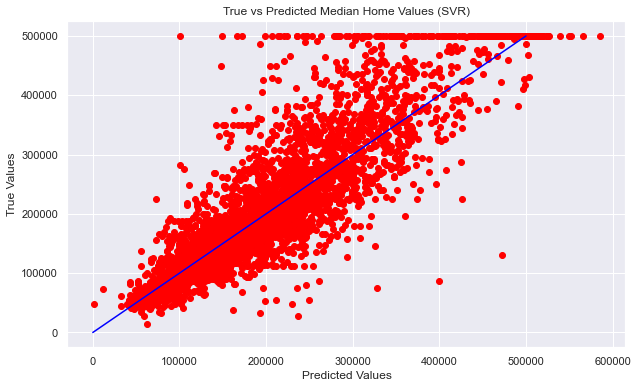

In [17]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set()
plt.scatter(y_pred.reshape(len(y_pred),1), sc_y.inverse_transform(y_test).reshape(len(y_test),1), color = 'red')
plt.plot(px, py, color='blue')
plt.title('True vs Predicted Median Home Values (SVR)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()
# plt.savefig('act_pred_svr_scatter.png')

In [28]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(sc_y.inverse_transform(y_test), y_pred))
print('Adjusted R2: ', 1-(1-r2_score(sc_y.inverse_transform(y_test), y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

R2:  0.7602046563549806
Adjusted R2:  0.7594392894344342


In [20]:
sc_y.inverse_transform(regressor.intercept_)

array([268392.51])

In [26]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(sc_y.inverse_transform(y_test), y_pred, squared=False)

56663.78352304441